In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam

In [2]:
executor = Executor("statevector_simulator")

Define parameterized quantum circuit $Q(x,\theta)$

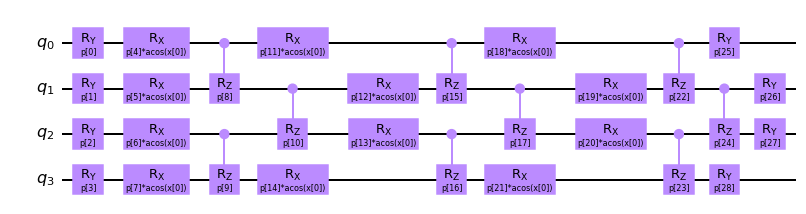

In [3]:
nqubits = 4
number_of_layers = 3
pqc = ChebPQC(nqubits, 1, num_layers=number_of_layers, closed=False)
pqc.draw()

Definition of the cost operator:
$\hat{C}(\vartheta) = \vartheta_0 \hat{I} + \sum_i \vartheta_i \hat{Z}_i $

In [4]:
cost_op = SummedPaulis(nqubits)
print(cost_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


Example function: $log(x)$

In [5]:
x_space = np.arange(0.1, 0.9, 0.01)
ref_values = np.log(x_space)

np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters) * 4
param_op_ini = np.ones(cost_op.num_parameters)

print(param_ini, param_op_ini)

[3.11080964 0.95016488 3.29711413 3.86299679 3.89040446 1.81379699
 2.43616985 3.10210606 2.56645338 2.88807292 0.1401461  1.19379788
 0.23404997 3.42824377 1.49141611 2.71939181 1.0251198  1.39032486
 0.03765108 1.43333513 3.79637673 0.87159604 1.27756547 3.67108954
 0.12761467 0.26033815 2.519316   3.49525377 0.03486293] [1. 1. 1. 1. 1.]


Optimization of the regression

In [6]:
ADAM = Adam({"maxiter_total": 100, "maxiter": 25, "lr": 0.1, "log_file": "adam_log.csv"})

reg = QNNRegressor(
    pqc,
    cost_op,
    executor,
    SquaredLoss(),
    ADAM,
    param_ini,
    param_op_ini,
    batch_size=10,
    epochs=30,
    shuffle=True,
)

reg.fit(x_space, ref_values)

Epoch     1/   30:	average_loss = 0.85857
Epoch     2/   30:	average_loss = 0.14363
Epoch     3/   30:	average_loss = 0.09674
Epoch     4/   30:	average_loss = 0.02930
Epoch     5/   30:	average_loss = 0.01286
Epoch     6/   30:	average_loss = 0.00548
Epoch     7/   30:	average_loss = 0.00511
Epoch     8/   30:	average_loss = 0.00322
Epoch     9/   30:	average_loss = 0.00202
Epoch    10/   30:	average_loss = 0.00224
Epoch    11/   30:	average_loss = 0.00163
Epoch    12/   30:	average_loss = 0.00218
Epoch    13/   30:	average_loss = 0.00175
Epoch    14/   30:	average_loss = 0.00183
Epoch    15/   30:	average_loss = 0.00211
Epoch    16/   30:	average_loss = 0.00259
Epoch    17/   30:	average_loss = 0.00186
Epoch    18/   30:	average_loss = 0.00121
Epoch    19/   30:	average_loss = 0.00113
Epoch    20/   30:	average_loss = 0.00082
Epoch    21/   30:	average_loss = 0.00076
Epoch    22/   30:	average_loss = 0.00155
Epoch    23/   30:	average_loss = 0.00158
Epoch    24/   30:	average_loss = 

In [7]:
print("Result Param:", reg.param)
print("Result ParamOp:", reg.param_op)

Result Param: [ 2.16990345  1.40494493  2.77301785  4.31785998  2.84500297  1.21751451
  2.2534327   2.43567554  1.60694106  4.57528259  0.76025785  1.81149248
 -0.56395195  3.22585462  0.74279254  1.86716215  1.90971307  2.05495574
 -0.91201776  2.07947224  3.44855837  0.9084184   1.50781228  3.37649559
  1.42949965  0.80805862  1.53321999  2.75813685  0.04616064]
Result ParamOp: [0.01560777 0.8145353  0.70203314 1.08825895 1.61127305]


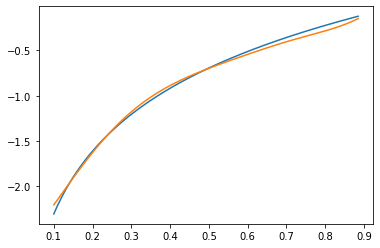

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)